In [1]:
# Import relevant packages.
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Load withdraw and deposit data.
withdraw_transactions_df = pd.read_csv("../data/lighter_complete_withdraw_txs.csv")
deposit_transactions_df = pd.read_csv("../data/lighter_complete_deposit_txs.csv")

In [3]:
# We will call a deposit_address to every address that has deposited in Tcash
deposit_addresses = deposit_transactions_df.from_address.unique()
#pd.DataFrame(deposit_addresses).to_csv("../data/deposit_addresses.csv")

# We will call a withdraw_address to every address that has withdrawal from Tcash
withdraw_addresses = withdraw_transactions_df.recipient_address.unique()
#pd.DataFrame(withdraw_addresses).to_csv("../data/withdraw_addresses.csv")


In [4]:
# Lets load the transactions_of_deposit_addresses, a dataframe that contains 
# all the transactions between a deposit address and a linked address
transactions_of_deposit_addresses =  pd.read_csv("../data/transactions_between_deposit_and_withdraw_addresses.csv")

### function linked_transactions_heuristic
The input DataFrame `transactions_of_deposit_addresses` contain transactions that involve deposit_addresees.
We want to link the input `withdraw_transaction` with a transaction inside the `transactions_of_deposit_addresses`. So, the  `linked_transactions_heuristic` function retuns all the transactions inside the `transactions_of_deposit_addresses` that involve the `withdraw_transaction.recipient_address` and where made before `withdraw_transaction.block_timestamp` 

Important: The input `transactions_of_deposit_addresses` must be sorted  by the column `block_timestamp` for the function to work.

In [5]:
def linked_transactions_heuristic(transactions_of_deposit_addresses, withdraw_transaction):
    
    linked_transactions = pd.DataFrame(columns =  ["withdraw_address", "deposit_address", "transaction_hash"])
    
    # We will iterate over every transaction between a deposit address and a withdraw address.
    # And get the ones between the withdraw_transaction.recipient_address and a deposit address
    for transaction in transactions_of_deposit_addresses.itertuples(index = False):
        # Since the transactions_of_deposit_addresses must be sorted, when we find a transaction
        # that was done before the withdraw_transaction.block_timestamp we can stop searching 
        if transaction.block_timestamp > withdraw_transaction.block_timestamp:
            break
        elif transaction.from_address == withdraw_transaction.recipient_address:
            linked_transactions.loc[len(linked_transactions)] = [withdraw_transaction.recipient_address, transaction.to_address, transaction.hash]
        elif transaction.to_address == withdraw_transaction.recipient_address:
            linked_transactions.loc[len(linked_transactions)] = [withdraw_transaction.recipient_address, transaction.from_address, transaction.hash]
    return linked_transactions

In [6]:
# Lets test the function
sorted_withdraw_transactions_df= withdraw_transactions_df.sort_values("block_timestamp", ignore_index = True )
sorted_transactions_of_deposit_addresses = transactions_of_deposit_addresses.sort_values("block_timestamp", ignore_index = True)
linked_transactions_heuristic(sorted_transactions_of_deposit_addresses,sorted_withdraw_transactions_df.loc[80700])


,withdraw_address,deposit_address,transaction_hash
0,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x806e3751307df85158db59247bf43ac4a76dd0854d76...
1,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x7a1f9f767d5737e549a404a1af933b12f4a6f048,0x518239c5c71ba0e2b805e6e8ed39849c30fdad90aaec...
2,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x8d46fa21b07ea83b9d3baee77fa11055a1e162d21141...
3,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x3829547cb1cb5154e6753e6832468f74a94adec19bc6...
4,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0x450551e229202bc643b3f45df8721b921869bd43f4b0...
5,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xbccdc6d1572ce74be0c6836460e0a40bbf8ead07031e...
6,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0x0557533e68c813a2bba37ca389233f7618c9327657cc...
7,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0x510059633c4958d43dfbc50b3b1a4ce6b9cb871a,0x1743d7077af28de73217ee384aff0532944b47183981...
8,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0x6aa263dd363ba99c433a8a4c9e6bfe8a120662029bf1...
9,0xee439ee079ac05d9d33a6926a16e0c820fb2713a,0xfea0904acc8df0f3288b6583f60b86c36ea52acd,0xef6fded787e78210c2d00bc83fe7c181fdb7b3d74917...


### function apply_linked_transactions_heuristic
Apply the `linked_transactions_heuristic` function to each withdraw of the input `withdraw_transactions_df` DataFrame.
Retuns a DataFrame with the columns: `withdraw_address`, `deposit_address` and `transaction_hash`.
You can read this DataFrame in the following way:
The `withdraw_address` is linked to the  `deposit_address` by the transaction `transaction_hash`

In [7]:
# Auxiliary function
# Add the new linked transactions we found to the linked_transactions DataFrame
def add_linked_transactions(linked_transactions, new_linked_transactions):
    for transaction in new_linked_transactions.itertuples(index= False):
        if transaction.transaction_hash not in linked_transactions.transaction_hash:
            linked_transactions.loc[len(linked_transactions)] = transaction
    return linked_transactions
    

In [8]:
def apply_linked_transactions_heuristic(transactions_of_deposit_addresses, withdraw_transactions_df):
    sorted_withdraw_transactions_df = withdraw_transactions_df.sort_values("block_timestamp", ignore_index = True)
    sorted_top_to_bottom_withdraw_transactions_df = withdraw_transactions_df.sort_values("block_timestamp", ignore_index = True, ascending = False)
    sorted_transactions_of_deposit_addresses = transactions_of_deposit_addresses.sort_values("block_timestamp", ignore_index = True)
    # To ensure we analizaed every withdraw address just once.
    analyzed_withdraw_addresses = []
    # To store all the linked transactions we found

    linked_transactions = pd.DataFrame(columns =  ["withdraw_address", "deposit_address", "transaction_hash"])
    
    # Iterate over every withdrawal transaction.
    # To optimize this for loop we will use the sorted_top_to_bottom_withdraw_transactions_df
    # So, when we analyzed a withdraw address we ensure that we get the withdraw 
    # with the highest :block_timestamp(see linked_transactions_heuristic function).
    for withdraw_transaction in tqdm(sorted_top_to_bottom_withdraw_transactions_df.itertuples(index = False),total = sorted_withdraw_transactions_df.shape[0], mininterval=30):
        if withdraw_transaction.recipient_address not in analyzed_withdraw_addresses:
    
            # Find all the transactions that the withdraw address has had with any deposit address
            new_linked_transactions = linked_transactions_heuristic(sorted_transactions_of_deposit_addresses, withdraw_transaction)
            
            # Add the new new_linked_transactions founf to the linked_transactions DataFrame
            linked_transactions = add_linked_transactions(linked_transactions, new_linked_transactions)
            
            # Push the to the withdraw_address to the analyzed_withdraw_addresses vector
            analyzed_withdraw_addresses.append(withdraw_transaction.recipient_address)
            
    return linked_transactions

In [10]:
results = apply_linked_transactions_heuristic(transactions_of_deposit_addresses, withdraw_transactions_df)
results

  0%|▏                                                           | 258/83782 [00:29<2:40:46,  8.66it/s]


KeyboardInterrupt: 

Lets inspect the results


In [15]:
groupby_results = results.groupby(["withdraw_address", "deposit_address"]).size().reset_index(name='counts').sort_values("counts", ascending=False)
groupby_results



,withdraw_address,deposit_address,counts
8,0x0aec2e426ed6cc0cf3c249c1897eac47a7faa9bd,0xf220f09cb17e664b7a0c11a3fb3030e487947acf,4
4,0x08c5ef8cb199f68d7f677dacbcd7522d11222ebf,0x0cc31edfdf0d9fca60694b99c27f6f4990c7e791,2
5,0x09befe62d0697a3e608c850f41d85d80369e7506,0x09befe62d0697a3e608c850f41d85d80369e7506,2
9,0x0b7c43af43d76f79b6f6cfbafb3a01dde0468225,0x0b7c43af43d76f79b6f6cfbafb3a01dde0468225,2
0,0x0000000000bc14115f9f67fde839f285667437bc,0x0000000000bc14115f9f67fde839f285667437bc,1
1,0x019ea9e87985355b4d4a1881bfc8af8fb6285800,0xe9c62867856baf9535283c162d36383bb90a2162,1
2,0x056590f16d5b314a132bbcfb1283fec5d5c6e670,0x056590f16d5b314a132bbcfb1283fec5d5c6e670,1
3,0x063c0e875bd76135042e70d29641e78a6a27e1d1,0x063c0e875bd76135042e70d29641e78a6a27e1d1,1
6,0x09cae46736f01b8c6adf64cc9691df356ea146cd,0x1da05f10b2cd57f7cf12910ce835bf0a41c3793d,1
7,0x0ada19c19ff4ec38451494c69d32cb8fe959c793,0x851a5b5855efcca35b3ffc20514415c49abbb2a0,1


In [18]:
groupby_results.sort_values("counts", ascending = False)

,withdraw_address,deposit_address,counts
8,0x0aec2e426ed6cc0cf3c249c1897eac47a7faa9bd,0xf220f09cb17e664b7a0c11a3fb3030e487947acf,4
4,0x08c5ef8cb199f68d7f677dacbcd7522d11222ebf,0x0cc31edfdf0d9fca60694b99c27f6f4990c7e791,2
5,0x09befe62d0697a3e608c850f41d85d80369e7506,0x09befe62d0697a3e608c850f41d85d80369e7506,2
9,0x0b7c43af43d76f79b6f6cfbafb3a01dde0468225,0x0b7c43af43d76f79b6f6cfbafb3a01dde0468225,2
0,0x0000000000bc14115f9f67fde839f285667437bc,0x0000000000bc14115f9f67fde839f285667437bc,1
1,0x019ea9e87985355b4d4a1881bfc8af8fb6285800,0xe9c62867856baf9535283c162d36383bb90a2162,1
2,0x056590f16d5b314a132bbcfb1283fec5d5c6e670,0x056590f16d5b314a132bbcfb1283fec5d5c6e670,1
3,0x063c0e875bd76135042e70d29641e78a6a27e1d1,0x063c0e875bd76135042e70d29641e78a6a27e1d1,1
6,0x09cae46736f01b8c6adf64cc9691df356ea146cd,0x1da05f10b2cd57f7cf12910ce835bf0a41c3793d,1
7,0x0ada19c19ff4ec38451494c69d32cb8fe959c793,0x851a5b5855efcca35b3ffc20514415c49abbb2a0,1


As we can see some withdraw_address have had transactions with more than one deposit_address and vice versa.
We will define that a withdraw_address and a deposit_address are linked, in the cases where the withdraw_address and the deposit_address have had transactions only between them.

For example:

Transaction 1: `deposit_address_1` -> `withdraw_address_1`

Transaction 2: `withdraw_address_1` -> `deposit_address_1`

Transaction 3: `deposit_address_2` -> `withdraw_address_2`

Transaction 4: `withdraw_address_2` -> `deposit_address_2`

Transaction 5: `withdraw_address_2` -> `deposit_address_3`


`deposit_address_1` and `withdraw_address_1` will be consider  linked.
`deposit_address_2` wont be linked to `deposit_address_2`, since withdraw_address_2 has had a transaction with  `deposit_address_3`


In [31]:
# Auxiliary functions 
# Checks if the given address is unique in the input column
def is_unique(address, column):
    return column.value_counts()[address] == 1

In [37]:
def get_linked_addresses(results):
    groupby_results = results.groupby(["withdraw_address", "deposit_address"]).size().reset_index(name='counts').sort_values("counts")
    withdraw_addresses = groupby_results["withdraw_address"]
    deposit_addresses = groupby_results["deposit_address"]
    linked_addresses = {}
    for row in groupby_results.itertuples(index = False):
        if is_unique(row.withdraw_address, withdraw_addresses) and is_unique(row.deposit_address, deposit_addresses):
            linked_addresses[row.withdraw_address] = row.deposit_address
        
    return linked_addresses




In [41]:
linked_addresses = get_linked_addresses(results)
linked_addresses
# In the Julia notebook this linked_addresses are saved into a CSV

{'0x0000000000bc14115f9f67fde839f285667437bc': '0x0000000000bc14115f9f67fde839f285667437bc',
 '0x019ea9e87985355b4d4a1881bfc8af8fb6285800': '0xe9c62867856baf9535283c162d36383bb90a2162',
 '0x056590f16d5b314a132bbcfb1283fec5d5c6e670': '0x056590f16d5b314a132bbcfb1283fec5d5c6e670',
 '0x063c0e875bd76135042e70d29641e78a6a27e1d1': '0x063c0e875bd76135042e70d29641e78a6a27e1d1',
 '0x09cae46736f01b8c6adf64cc9691df356ea146cd': '0x1da05f10b2cd57f7cf12910ce835bf0a41c3793d',
 '0x0ada19c19ff4ec38451494c69d32cb8fe959c793': '0x851a5b5855efcca35b3ffc20514415c49abbb2a0',
 '0x444444cc7fe267251797d8592c3f4d5ee6888d62': '0x0039f22efb07a647557c7c5d17854cfd6d489ef3',
 '0x4b5922abf25858d012d12bb1184e5d3d0b6d6be4': '0x047f606fd5b2baa5f5c6c4ab8958e45cb6b054b7',
 '0x7f5ccfb50d9087a572a80ec2585bde8e0377625c': '0x0b6ef5af62cdf5b609620fcc3dd21540b92c5e9c',
 '0x08c5ef8cb199f68d7f677dacbcd7522d11222ebf': '0x0cc31edfdf0d9fca60694b99c27f6f4990c7e791',
 '0x09befe62d0697a3e608c850f41d85d80369e7506': '0x09befe62d0697a3e608c

### Results visualization

In [ ]:
function get_histogram_data(results, withdraw_transactions_df)
    groupby_results = combine(groupby(results, [:withdraw_address, :deposit_address]), nrow => :count)
    withdraw_addresses = withdraw_transactions_df[!, [:recipient_address]] |> unique |> Matrix
    linked_addresses = Dict()
    
    ## Ver get addresses que solo se relacionan con 1 withdraw e iterar sobre eso
    for withdraw_address in withdraw_addresses
        linked_addresses[withdraw_address] = 0
    end
    
    for row ∈ eachrow(groupby_results)
            linked_addresses[row.withdraw_address] += 1
    end
    
    return linked_addresses
end


In [80]:
def get_histogram_data(results, withdraw_transactions_df):
    groupby_results = results.groupby(["withdraw_address", "deposit_address"]).size().reset_index(name='counts').sort_values("counts")
    withdraw_addresses = withdraw_transactions_df.recipient_address.unique()
    linked_addresses = {}

    for withdraw_address in withdraw_addresses:
        linked_addresses[withdraw_address] = 0
    
    for row in groupby_results.itertuples(index = False):
        linked_addresses[row.withdraw_address] += 1
    
    return linked_addresses


In [81]:
result_values = get_histogram_data(results, withdraw_transactions_df)

1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1


In [61]:
result_values = valuesget_histogram_data(results, withdraw_transactions_df))
histogram(result_values, bins= maximum(result_values) ,legend=false, title="#Deposit addresses linked", xlabel="Withdraws")


SyntaxError: unmatched ')' (3945735088.py, line 1)

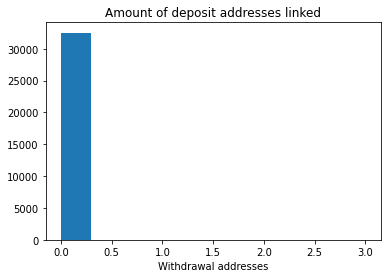

In [79]:
plt.hist(result_values.values())
plt.title("Amount of deposit addresses linked")
plt.xlabel("Withdrawal addresses")
plt.show()